In [2]:
import matplotlib.pyplot as plt
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_90b10fbeca6c4d058035417d934397fa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eGM4hoDEBWEHIkj2wVo951MSw9QUVyaLAPd3wvsnVQMk',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_90b10fbeca6c4d058035417d934397fa.get_object(Bucket='nycproject-donotdelete-pr-dcxrsxebrzgstt',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body).dropna()
df_data_1.head()



,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
1,2018-08-11T19:19:41.000,39981834,PAINT/PLASTER,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:02.000,RESIDENTIAL BUILDING,Closed
2,2018-08-11T19:19:41.000,39982698,APPLIANCE,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:01.000,RESIDENTIAL BUILDING,Closed
3,2018-08-11T19:19:41.000,39987943,UNSANITARY CONDITION,11429.0,104-34 219 STREET,219 STREET,ADDRESS,Queens Village,The Department of Housing Preservation and Dev...,QUEENS,40.711539,-73.735724,2019-03-30T08:58:01.000,RESIDENTIAL BUILDING,Closed
4,2018-10-23T19:27:06.000,40636028,DOOR/WINDOW,11412.0,116-35 195 STREET,195 STREET,ADDRESS,Saint Albans,The Department of Housing Preservation and Dev...,QUEENS,40.693715,-73.757117,2019-03-30T08:58:02.000,RESIDENTIAL BUILDING,Closed
5,2018-10-23T19:27:06.000,40637746,UNSANITARY CONDITION,11412.0,116-35 195 STREET,195 STREET,ADDRESS,Saint Albans,The Department of Housing Preservation and Dev...,QUEENS,40.693715,-73.757117,2019-03-30T08:58:02.000,RESIDENTIAL BUILDING,Closed


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import folium
#Which area needs the highest effort:

In [5]:
# Clean the data and assign Unspecified borough to a borough based on the city 
df_data_1.loc[df_data_1.city == 'NEW YORK', ['borough']] = 'MANHATTAN'
df_data_1.loc[df_data_1.borough == 'Unspecified', ['borough']] = 'QUEENS'

incident_zip
11226.0    204559
10467.0    164908
10458.0    160515
10453.0    153947
10468.0    140283
Name: incident_zip, dtype: int64


In [86]:
# Prints the boroughs, cities, and zipcodes in descending order based on number of complaints
print(df_data_1.groupby(df_data_1['borough'].str.lower())['borough'].count().sort_values(ascending = False))
print(df_data_1.groupby(df_data_1['city'].str.lower())['city'].count().sort_values(ascending = False))
print(df_data_1.groupby(df_data_1['incident_zip'])['incident_zip'].count().sort_values(ascending = False))

borough
brooklyn         1636553
bronx            1516490
queens           1396795
manhattan         982508
staten island      82480
Name: borough, dtype: int64
city
brooklyn               1923332
bronx                  1760875
new york               1132320
staten island            96459
jamaica                  92232
astoria                  56866
flushing                 55777
far rockaway             48933
ridgewood                45038
elmhurst                 40686
corona                   32458
woodside                 28050
jackson heights          28002
forest hills             19470
rego park                18359
sunnyside                16171
south richmond hill      15177
queens village           15101
ozone park               14234
richmond hill            13872
east elmhurst            12715
saint albans             12714
woodhaven                12309
kew gardens              12073
hollis                   11666
arverne                  11641
south ozone park         115

In [95]:
# Finds the borough and zipcode with the maximum number of complaints 

max_zipcode = df_data_1.groupby('incident_zip')['incident_zip'].count().idxmax()
max_borough = df_data_1.groupby('borough')['borough'].count().idxmax()

print("Maximum complaints are in {} or in zipcode {}".format(max_borough,int(max_zipcode)))

Maximum complaints are in BROOKLYN or in zipcode 11226


In [35]:
# Create dataframes for every borough

dfQ = df_data_1[(df_data_1['borough'] == 'QUEENS')]
dfM = df_data_1[(df_data_1['borough'] == 'MANHATTAN')]
dfBX = df_data_1[(df_data_1['borough'] == 'BRONX')]
dfBN = df_data_1[(df_data_1['borough'] == 'BROOKLYN')]
dfS = df_data_1[(df_data_1['borough'] == 'STATEN ISLAND')]


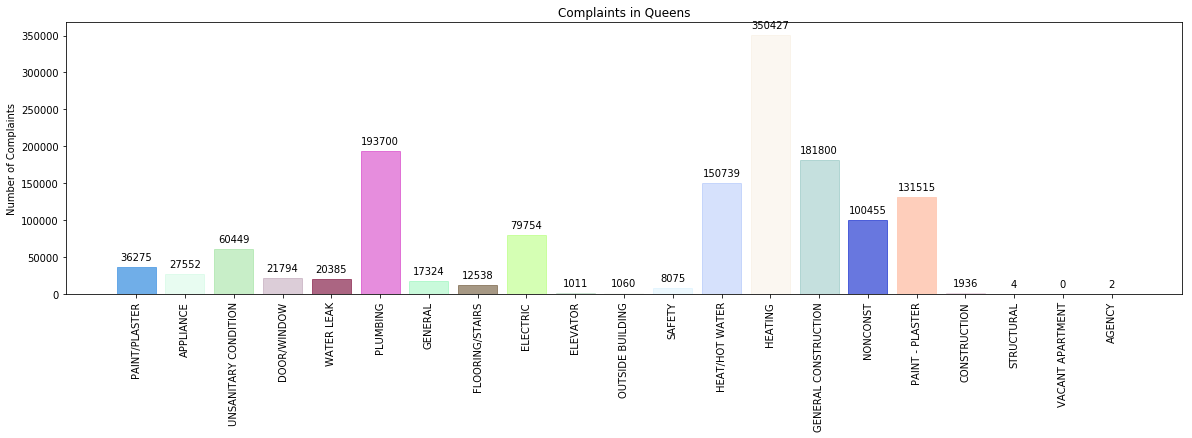

In [36]:
# Draw bar graph of complaints in Queens to infer which complaint type needs the most attention

yaxis = []
for a in df_data_1['complaint_type'].unique():
    yaxis.append(dfQ[dfQ.complaint_type == a].shape[0])

ind = np.arange(len(yaxis))  # the x locations for the groups
width = 0.8  # the width of the bars
fig, ax = plt.subplots(figsize = (20,5))
rects1 = ax.bar(ind, yaxis, width)
labels = df_data_1['complaint_type'].unique()
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints in Queens')
plt.xticks(ind, labels, rotation=90)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
for i in range(0,labels.size):
    rects1[i].set_color(np.random.rand(4,))

add_value_labels(ax)
plt.show()

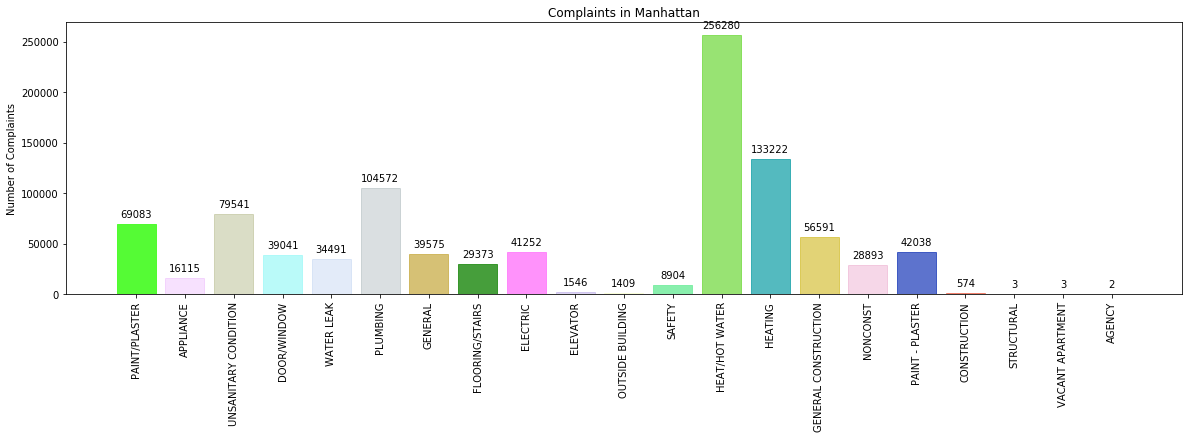

In [37]:
# Draw bar graph of complaints in Manhattan to infer which complaint type needs the most attention

yaxis = []
for a in df_data_1['complaint_type'].unique():
    yaxis.append(dfM[dfM.complaint_type == a].shape[0])

ind = np.arange(len(yaxis))  # the x locations for the groups
width = 0.8  # the width of the bars
fig, ax = plt.subplots(figsize = (20,5))
rects1 = ax.bar(ind, yaxis, width)
labels = df_data_1['complaint_type'].unique()
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints in Manhattan')
plt.xticks(ind, labels, rotation=90)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
for i in range(0,labels.size):
    rects1[i].set_color(np.random.rand(4,))

add_value_labels(ax)
plt.show()

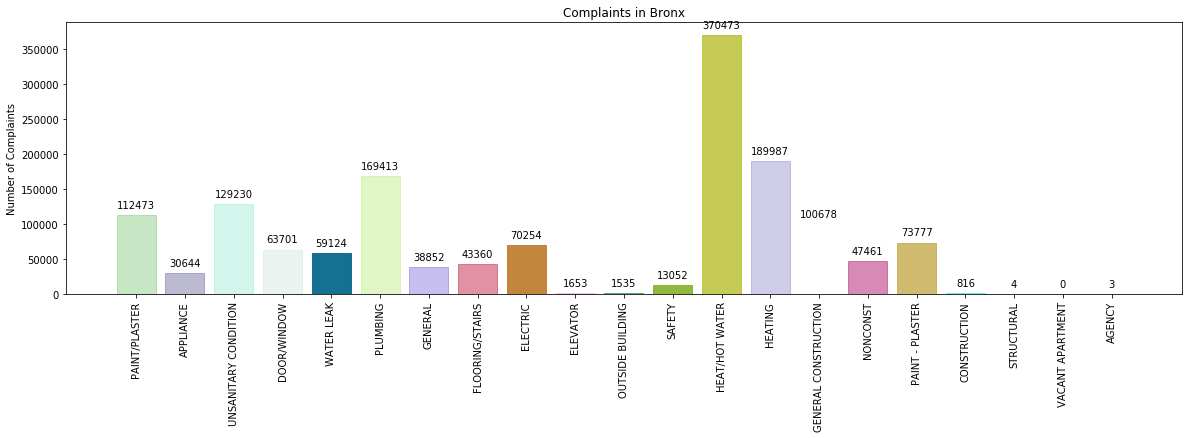

In [39]:
# Draw bar graph of complaints in Bronx to infer which complaint type needs the most attention

yaxis = []
for a in df_data_1['complaint_type'].unique():
    yaxis.append(dfBX[dfBX.complaint_type == a].shape[0])

ind = np.arange(len(yaxis))  # the x locations for the groups
width = 0.8  # the width of the bars
fig, ax = plt.subplots(figsize = (20,5))
rects1 = ax.bar(ind, yaxis, width)
labels = df_data_1['complaint_type'].unique()
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints in Bronx')
plt.xticks(ind, labels, rotation=90)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
for i in range(0,labels.size):
    rects1[i].set_color(np.random.rand(4,))

add_value_labels(ax)
plt.show()

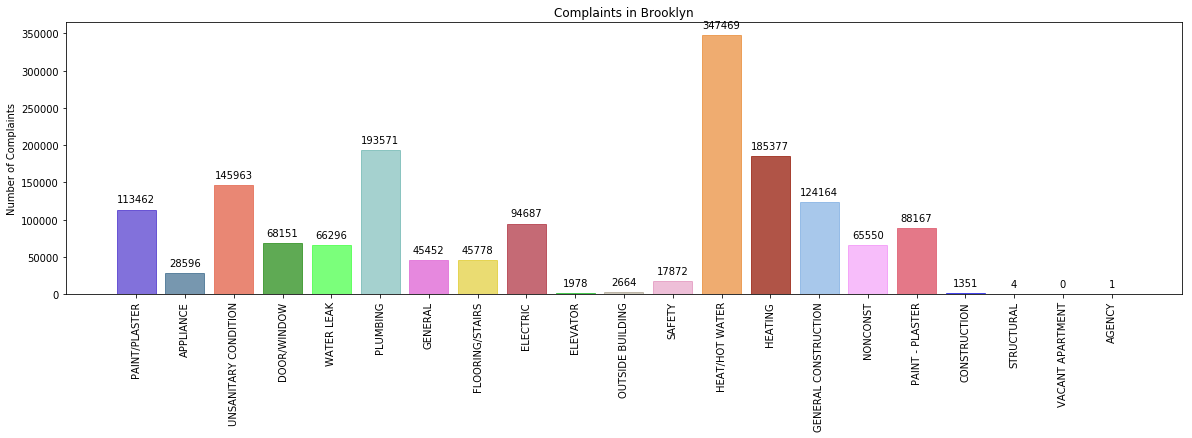

In [40]:
# Draw bar graph of complaints in Brooklyn to infer which complaint type needs the most attention

yaxis = []
for a in df_data_1['complaint_type'].unique():
    yaxis.append(dfBN[dfBN.complaint_type == a].shape[0])

ind = np.arange(len(yaxis))  # the x locations for the groups
width = 0.8  # the width of the bars
fig, ax = plt.subplots(figsize = (20,5))
rects1 = ax.bar(ind, yaxis, width)
labels = df_data_1['complaint_type'].unique()
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints in Brooklyn')
plt.xticks(ind, labels, rotation=90)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
for i in range(0,labels.size):
    rects1[i].set_color(np.random.rand(4,))

add_value_labels(ax)
plt.show()

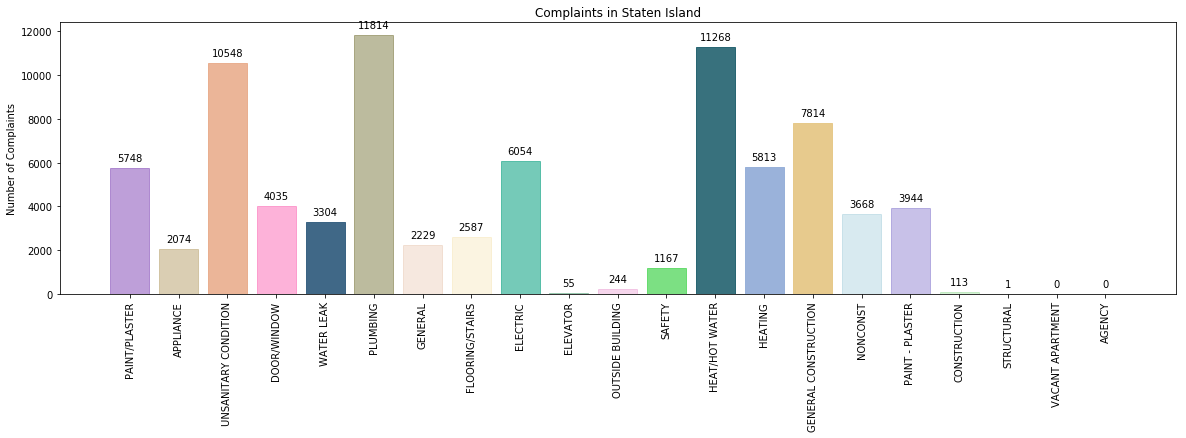

In [41]:
# Draw bar graph of complaints in Staten Island to infer which complaint type needs the most attention

yaxis = []
for a in df_data_1['complaint_type'].unique():
    yaxis.append(dfS[dfS.complaint_type == a].shape[0])

ind = np.arange(len(yaxis))  # the x locations for the groups
width = 0.8  # the width of the bars
fig, ax = plt.subplots(figsize = (20,5))
rects1 = ax.bar(ind, yaxis, width)
labels = df_data_1['complaint_type'].unique()
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints in Staten Island')
plt.xticks(ind, labels, rotation=90)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
for i in range(0,labels.size):
    rects1[i].set_color(np.random.rand(4,))

add_value_labels(ax)
plt.show()

In [1]:
# Draw a comparative bar graph of complaints in NYC to infer which complaint type needs the most attention

yaxis = []
for a in df_data_1['complaint_type'].unique():
    yaxis.append(dfQ[dfQ.complaint_type == a].shape[0])
    yaxis.append(dfM[dfM.complaint_type == a].shape[0])
    yaxis.append(dfBX[dfBX.complaint_type == a].shape[0])
    yaxis.append(dfBN[dfBN.complaint_type == a].shape[0])
    yaxis.append(dfS[dfS.complaint_type == a].shape[0])
    yaxis.append(0)

ind = np.arange(len(yaxis))  # the x locations for the groups
width = 1 # the width of the bars
fig,ax = plt.subplots(figsize = (40,10))
rects1 = ax.bar(ind, yaxis, width, edgecolor='black', linewidth=1.2)
for i in range(0,121,6):
    rects1[i].set_color('r')
    i = i + 1
    rects1[i].set_color('b')
    i = i + 1
    rects1[i].set_color('g')
    i = i + 1
    rects1[i].set_color('y')
    i = i + 1
    rects1[i].set_color('k')
    i = i + 1
    rects1[i].set_color('w')
    i = i + 1


labels = []

for i in range(0,21):
    labels.append(' ')
    labels.append(' ')
    labels.append(df_data_1['complaint_type'].unique()[i])
    labels.append(' ')
    labels.append(' ')
    labels.append(' ')
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints in NYC')
plt.xticks(ind, labels, rotation=90)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
ax.legend( (rects1[0], rects1[1], rects1[2], rects1[3], rects1[4]), ('Queens', 'Manhattan', 'Bronx', 'Brooklyn', 'Staten Island') )

    

add_value_labels(ax)
plt.show()

NameError: name 'df_data_1' is not defined

In [ ]:
# Map to visualize 1000 of the most recent complains in NYC clustered to show different areas of complains

from folium import plugins

df_data_2 = df_data_1.head(1000)

map_obj = folium.Map(location = [40.700431, -73.978076], zoom_start = 6)

complains = plugins.MarkerCluster().add_to(map_obj)

for lat, lng, label, in zip(df_data_2.latitude, df_data_2.longitude, df_data_2.complaint_type):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(complains)

map_obj